In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/TCD/data.csv')
data

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when your ...,ffe987279560d7ff,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159567,you should be ashamed of yourself that is a ho...,ffea4adeee384e90,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159568,spitzer umm theres no actual article for pros...,ffee36eab5c267c9,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
159569,and it looks like it was actually you who put ...,fff125370e4aaaf3,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(159571, 10)

In [ ]:
data['label'] = data['toxicity'].apply(lambda x : 1 if x > 0 else 0)

In [ ]:
data = data[['comment_text', 'label']]

In [ ]:
data

,comment_text,label
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on im...,0
4,you sir are my hero any chance you remember...,0
...,...,...
159566,and for the second time of asking when your ...,0
159567,you should be ashamed of yourself that is a ho...,0
159568,spitzer umm theres no actual article for pros...,0
159569,and it looks like it was actually you who put ...,0


<AxesSubplot:xlabel='label', ylabel='count'>

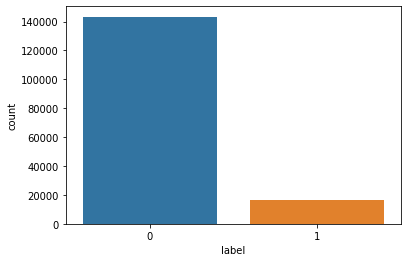

In [ ]:
sns.countplot(x = data.label)

In [ ]:
data.isnull().sum()

comment_text    0
label           0
dtype: int64

In [ ]:
 pip install text_hammer

In [ ]:
import text_hammer as th
import re

In [ ]:
def cleaner(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = th.remove_emails(x)
    x = th.remove_urls(x)
    x = th.remove_html_tags(x)
    x = th.remove_rt(x)
    x = th.remove_accented_chars(x)
    x = th.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x


data.comment_text = data.comment_text.apply(cleaner)
data

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,comment_text,label
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m se...,0
2,hey man i m really not trying to edit war it s...,0
3,more i can t make any real suggestions on impr...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
159566,and for the second time of asking when your vi...,0
159567,you should be ashamed of yourself that is a ho...,0
159568,spitzer umm theres no actual article for prost...,0
159569,and it looks like it was actually you who put ...,0


In [ ]:
# To enable UTF-8 locale

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
pip install transformers

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

train, test = train_test_split(data, test_size=0.3, stratify=data.label, random_state=44)
test, val = train_test_split(test, test_size=0.3, stratify=test.label, random_state=44)

dataset = {
    "TRAIN": train['comment_text'].values.tolist(),
    "TEST": test['comment_text'].values.tolist(),
    "VAL": val['comment_text'].values.tolist()
          }
          
targets = {
    "TRAIN": train['label'].values.tolist(),
    "TEST": test['label'].values.tolist(),
    "VAL": val['label'].values.tolist()
          }

In [ ]:
max_seq_length = 50

def tokenization(data):
    return tokenizer(data, 
                     padding='max_length', 
                     max_length=max_seq_length,
                     truncation=True, 
                     return_tensors="tf")
    


inputs = tokenization(dataset['TRAIN'])
train_targets = tf.convert_to_tensor(targets['TRAIN'])

val_inputs = tokenization(dataset['VAL'])
val_targets = tf.convert_to_tensor(targets['VAL'])

In [ ]:
from transformers import TFDistilBertModel

dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
input_ids = tf.keras.Input(shape=(max_seq_length,), dtype='int32', name='input_ids')
attention_mask = tf.keras.Input(shape=(max_seq_length,), dtype='int32', name='attention_mask')

# DistilBertModel Layer
inputs_to_dbl = {'input_ids': input_ids, 'attention_mask': attention_mask}
outputs = dbert_model(inputs_to_dbl)
# outputs.trainable = False
embeddings = outputs['last_hidden_state']
pool = tf.keras.layers.GlobalMaxPool1D()(embeddings)

# Fully connected Neural Network
h1 = tf.keras.layers.Dense(16, activation='relu')(pool)
d1 = tf.keras.layers.Dropout(0.4)(h1)
h2 = tf.keras.layers.Dense(8, activation='relu')(d1)
d2 = tf.keras.layers.Dropout(0.4)(h2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(d2)

# Model Creation
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

# Model compiling
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metrics = [tf.keras.metrics.BinaryAccuracy()]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 50)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['attention_mask[0][0]',         
 BertModel)                     ast_hidden_state=(N               'input_ids[0][0]']              
                                one, 50, 768),                                                    
                                 hidden_states=None                                           

In [ ]:
model.fit([inputs.input_ids, inputs.attention_mask],
              train_targets, 
              validation_data = ([val_inputs.input_ids, val_inputs.attention_mask], val_targets),
              epochs=3,
              batch_size=128)

Epoch 1/3
873/873 [==============================] - 577s 632ms/step - loss: 0.2526 - binary_accuracy: 0.9018 - val_loss: 0.1166 - val_binary_accuracy: 0.9607
Epoch 2/3
873/873 [==============================] - 530s 607ms/step - loss: 0.1756 - binary_accuracy: 0.9397 - val_loss: 0.1177 - val_binary_accuracy: 0.9609
Epoch 3/3
873/873 [==============================] - 547s 627ms/step - loss: 0.1424 - binary_accuracy: 0.9577 - val_loss: 0.1387 - val_binary_accuracy: 0.9616


In [ ]:
test_inputs = tokenization(dataset["TEST"])
result_proba = model.predict([test_inputs.input_ids, test_inputs.attention_mask])
result = [1 if x>0.5 else 0 for x in result_proba.ravel()]

1048/1048 [==============================] - 63s 59ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(targets['TEST'],result))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30102
           1       0.88      0.74      0.80      3408

    accuracy                           0.96     33510
   macro avg       0.93      0.86      0.89     33510
weighted avg       0.96      0.96      0.96     33510



<AxesSubplot:>

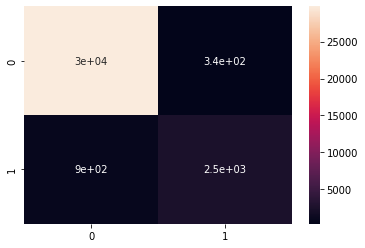

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(targets['TEST'],result)
sns.heatmap(cm, annot = True)

In [ ]:
cm

array([[29767,   335],
       [  895,  2513]])

In [ ]:
print(hi)

In [ ]:
user_input = list(str(input()))
tokens = tokenization(user_input)
predicted_raw = model.predict([tokens.input_ids, tokens.attention_mask])
np.argmax(predicted_raw[0], axis = 1)


hi hello
1/1 [==============================] - 0s 61ms/step


AxisError: ignored

In [ ]:
result_p

array([[2.63114478e-02],
       [5.36892228e-02],
       [4.79057198e-04],
       [1.88146753e-03],
       [8.22891088e-05],
       [9.21068341e-03],
       [6.43117633e-03],
       [5.36892228e-02],
       [1.94118582e-02],
       [8.22891088e-05],
       [2.63114478e-02],
       [6.87309890e-04],
       [3.82682635e-03],
       [7.17304065e-04],
       [2.45781429e-03],
       [9.21068341e-03],
       [8.22891088e-05],
       [2.18848139e-03],
       [6.43117633e-03],
       [7.17304065e-04],
       [2.45781429e-03],
       [1.69594621e-03],
       [1.94118582e-02],
       [8.22891088e-05],
       [6.87309890e-04],
       [4.57030535e-03],
       [8.22891088e-05],
       [7.17304065e-04],
       [2.45781429e-03],
       [1.69594621e-03],
       [8.22891088e-05],
       [1.02755785e-01],
       [2.06453856e-02],
       [2.06453856e-02],
       [8.22891889e-05],
       [2.03042943e-03],
       [1.94118582e-02],
       [9.21066198e-03]], dtype=float32)

In [ ]:
data[data.label == 1]

,comment_text,label
6,cock suck before you piss around on my work,1
12,hey what is it talk what is it an exclusive gr...,1
16,bye don t look come or think of comming back t...,1
42,you are gay or antisemmitian archangel white t...,1
43,fuck your filthy mother in the ass dry,1
...,...,...
159494,our previous conversation you fuck ing shit ea...,1
159514,you are a mischievious pubic hair,1
159541,your absurd edits your absurd edits on great w...,1
159546,hey listen don t you ever delete my edits ever...,1


In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='tf')
test_encodings = tokenizer(X_test, truncation=True, padding=True, return_tensors='tf')

NameError: ignored

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),y_test))

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=10,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps=10,
)
   

In [ ]:
print(hi)

In [ ]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

trainer.train()

In [ ]:
trainer.evaluate(test_dataset)

In [ ]:
trainer.predict(test_dataset)

In [ ]:
output = trainer.predict(test_dataset)[1]

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,output)
cm